# Généralités

## Problématique liée à l'article 
Problématique spécifque : Débruitage d'images.

Problématique globale : Comprendre ce qui fait par essence, qu'une image est une image réelle et qu'une autre n'est pas une image réelle. Car mathématiquement une image est juste un vecteur à N composantes. Pourquoi un vecteur est interprété par notre cerveau comme une image réelle, alors qu'une autre ne l'est pas (notion de prior). À quoi doit ressembler une image pour être une image réelle?

## Quel est l'objectif de l'article ?

Pour extraire une information d'un signal bruité, il existe des méthodes en traitement du signal de processus, de déduction basée sur des informations partielles du signal d'origine.

Ces méthodes ne sont pas efficaces dans le cas de traitement d'image, car le jeu de données est bien trop grand.

Les méthodes d'apprentissage automatique ont révolutionné ce problème de traitement d'image, il est maintenant facile par ces méthodes, comme le CNN, d'extraire une image originel d'une image bruitée.

Le problème de ces méthodes est qu'elles sont spécifiques à chaque problème. Les méthodes avec a priori (informations partielles) sont plus universels.

**L'objectif de cet article est d'essayer d'extraire d'un apprentissage automatique, la manière dont il intègre de manière implicite une connaissance a priori sophistiquée des images. L'article s'intéresse particulièrement au cas d'un bruitage gaussien.**

### Cadre plus précis par rapport aux méthodes utlisées jusque là dans la littérature
Les deux méthodes de débruitage sont :
1. **Approche traditionnelle :**
$ \hat{x}(y) = \int x p(x|y)dx = \int x p(y|x)p(x)dx / p(y) $ ($y$ étant l'image bruité, $x$ l'image originale et $\hat{x}(y)$ l'estimation de $x$)
   - Choix d'un modèle de probabilité a priori \(p(x)\).
   - Combinaison avec une fonction de vraisemblance \(p(y|x)\) décrivant le processus de mesure bruitée.
   - Résolution du problème en calculant l'estimation du minimum d'erreur quadratique moyenne (MMSE) ($\hat{x}(y)$) à partir de l'intégration de la densité postérieure.
Problème : probabilité a priori \(p(x)\) difficile à obtenir voire impossible surtout dans le cas de traitement d'image.

2. **Approche moderne de débruitage par apprentissage supervisé :**
   - Apprentissage supervisé d'une fonction de mapping directe des images bruitées aux images débruitées à l'aide de réseaux de neurones convolutionnels (CNN).
   - Paramétrage de la fonction d'estimation en forme paramétrique.
   - Ajustement des paramètres en minimisant l'erreur quadratique moyenne du débruitage sur un ensemble d'entraînement étendu.
   - Les CNN, formés pour gérer divers niveaux de bruit, effectuent une projection approximative sur un sous-espace de basse dimension, interprété comme un hyperplan tangent de la variété d'images.
Problème : besoin d'un entraînement supervisé préalable qui amène souvent à un overfitting des paramètres, non universel.


### Obejctif final 
1. On prend une image
2. On lui applique un filtre gaussien
3. On lui applique un algorithme pour obtenir une image débruitée aussi proche que possible de l'image initiale.

## Représentation des images réelles et bruitées

Nous pouvons voir les images comme des vecteurs évoluant dans $\mathbb{R}^N$ où $N$ est le nombre de pixel composant l'image. 
C'est la représentation que nous utilisons pour coder les images.

Nous pouvons représenter visuellement ces images sur un espace 2D pour mieux comprendre.
On peut voir le plan comme l'ensemble des images possibles $E$ et un point de ce plan correspond à une image $x\in E$.

- Les images visuelles/réelles/priors résident sur un sous espace de plus basse dimension que $E$. Les images sur ce sous espace sont approximativement équiprobables - du moins localement. La probabilité $p(x)$ que $x$ soit une image naturelle est nulle partout sauf là où $x$ réside sur l'espace. Comme représenté sur l'image ci-dessous. Plus précisement, on représente ici l'ensemble des images qui peuvent correspondre à l'oeil à des images "de perroquets nettes".

<img src="figs/fig1.png" width="680" height="250">

- Les images observées/bruitées (dans notre cas par un bruit gaussien) sont des versions floues (gaussienne) des priors. Les densités d'observation associées sont une représentation gaussienne des priors. Comme représenté sur l'image ci-dessous (pour des valeurs de variance croissantes): plus l'on s'écarte du sous espace, plus l'image de perroquet apparaît flou. On note $y$ ces images et $p(y)$ leur probabilité associée.

<img src="figs/fig2.png" width="630" height="265">

## Principe de la méthode avec un bruit gaussien

### Lien entre $y$ et $x$ 

$y$ et $x$ sont liés par l'équation $y = x + z$, où $x \in \mathbb{R}^N$ représente l'image originale tirée de $p(x)$, et $z \sim \mathcal{N}(0, \sigma^2I_N)$ est un échantillon de bruit blanc gaussien.

### Approche d'apprentissage automatique classique pour le débruitage de l'image
Classiquement en apprentissage automatique, on utilise la méthode des moindres carrés.

Formule utilisée :
<img src="figs/fig3.png" width="630" height="265">

Schéma de la méthode :
![](https://latex.codecogs.com/svg.latex?\hat{x}(y)=\text{argmin}_{\hat{x}}\int||\hat{x}-x||^2p(x|y)dx=\int\left.xp(x|y)dx\right.) 

On obtient alors un réseau de neuronne (par exemple par CNN) entraîné pour le débruitage d'images bruité par un bruit gaussien noté $\hat{x}_{CNN}(y)$


### Approche d'apprentissage automatique utilisant le prior implicite 
 
Miyasawa (1961) a montré que l'estimation des moindres carrés pouvait être écrite (exactement) dans le cas d'une contamination gaussienne comme suit :

![](https://latex.codecogs.com/svg.latex?\hat{x}(y)=\int(xp(x|y)dx)=y+\sigma^2\nabla_y\log(p(y)))

L'approche va alors être de combiner ce résultat exact au réseau de neurones obtenu. **La méthode est expliquée ci-dessous dans la partie algorithme.** On obtient un algorithme simple qu'il suffit d'appliquer directement à une image bruitée.


### Avantage de la deuxième

Un algorithme d'apprentissage automatique classique réalise une minimisation de fonction entre les paramètres du réseau de neurones et l'image de départ. Cela mène généralement à un overfitting du problème. Notre réseau de neurone est efficace pour retrouver l'image de départ mais il n'est bon que pour cette image et il a eu besoin de cette image pour s'entraîner. Il demande également une longue phase d'entraînement.

Avec la méthode de l'article, pour retrouver une image proche de celle de l'image de départ, nous n'avons pas besoin de l'image de départ, il suffit juste d'appliquer l'algorithme. Du fait qu'il n'ait pas besoin de l'image de départ pour retrouver l'image cette méthode est universelle.

Les chercheurs ont montré de plus que l'image retrouvé est de meilleur qualité dans la deuxième méthode !

On a donc déjà trois avantages :
- Pas besoin de reconstruire un réseau neurones pour débruiter l'image et donc pas besoin de connaître l'image de départ (car plus besoin d'apprentissage supervisé).
- Méthode universelle à toute image ayant subi un filtre gaussien. Elle n'est pas efficacement spécifique à certianes images.
- Les résultats sont meilleurs qu'avec un CNN sans a priori.

### Exemple de débruitage par l'algorithme 
![](figs/synthesis_mnist_1.png)



# Partie plus technique sur les contributions de l'article: algorithmes en détail

## Algorithme de base

### Principe 
- On considère une condition initiale $y0$ (image bruitée par un bruit gaussien), on voudrait retrouver le $x$ (image réel), on note $\hat{x}(y0)$ l'image débruitée.
    Le bruit étant gaussien on connait l'expression exacte de cette image débruitée : 
    
![](https://latex.codecogs.com/svg.latex?\hat{x}(y)=\int(xp(x|y)dx)=y+\sigma^2\nabla_y\log(p(y)))
Mais nous ne connaissons pas la variance $\sigma$ qui a été utilisée pour bruiter l'image.
    
- En revanche, on connaît un CNN entraîné (pour le débruitage d'images bruité par un bruit gaussien) noté $\hat{x}_{CNN}(y)$ , c'est ici que nous allons utiliser la notion de prior implicite. Le réseau de neurones entraîné donne des bons résultats. Il possède donc une version approchée de l'expression exacte que nous avons au-dessus. Nous allons donc le combiner à la formule pour obtenir une image débruitée de qualité.

- On a : $\sigma^2\nabla_y\log(p(y)))=\hat{x}(y)-y$. Ainsi, une version approchée de $\sigma^2\nabla_y\log(p(y_0)))$ est donnée par : $\hat{x}_{CNN}(y_0)-y_0 = f(y_0)$ ($f$ pour résiduel). Et donc $\hat{x}_{approx}(y_0) = y_0 + f(y_0)$.

- En écrivant la valeur approchée de cette manière, on obtient juste $\hat{x}_{CNN}(y_0)$ et alors on n'a pas exploité la formule. On ajoute donc un paramètre de contrôle $h$ compris entre 0 et 1 qui permet de contrôler le résidu que l'on injecte à $y_0$: $\hat{x}_{approx}(y_0) = y_0 + hf(y_0)$

- $\hat{x}_{approx}(y_0)= y_0(1-h) + \hat{x}_{CNN}(y_0)$ que l'on notera désormais $y_1$ est donc une nouvelle image  bruitée de variance $\sigma_1=\sigma_0(1-h)$, expression bonne si l'on considère $\hat{x}_{CNN}$ parfait c'est à dire non stochastique. On remarque que $\sigma_1<\sigma_0$. Ainsi $y_1$ est une image bruitée de l'espace des variétés mais moins bruité que celle d'avant.

- En réitérant ce procédé, on obtient au bout d'un certain nombre d'itération, une image non bruité de l'espace des variétés, c'est-à-dire une image réelle (ie non bruité, $p(x)$ dirac). 

- Cette image n'a pas de raison de correspondre à $\hat{x}(y0)$. Mais par la construction de l'algorithme, on obtient une image qui est **réelle / semble naturelle** et qui est **proche de $\hat{x}(y_0)$** (car pas trop éloigné dans l'espace des variétés).

### Ecriture formelle

**Algorithm 0**: Coarse-to-fine gradient ascent method for sampling from the implicit prior of a denoiser, using denoiser residual $f(y) = \hat{x}(y) - y$.

*Parameters:* $\sigma_0, \sigma_L, h$

*Initialization:* $t = 1$, draw $y_0 \sim \mathcal{N}(0.5, \sigma_0^2I)$

**while** $\sigma_{t-1} \leq \sigma_L$ do:

- $d_t = f(y_{t-1})$
- $y_t \leftarrow y_{t-1} + h d_t$
- $t \leftarrow t+1$

**end while**


## Algorithme améliorée par ajout de bruit à chaque itération et modification du paramètre de contrôle

### Intérêt d'injecter un bruit
Deux raisons :
1. Éviter de tomber dans un minimum local
2. Permettre une exploration stochastique de l'ensemble de l'espace (manifold). L'image que l'on recherche étant la plus réelle, on a naturellement plus de chance de tomber proche de celle-ci si on réalise une grande exploration de l'espace.

### Intérêt de la modification du paramètre de contrôle

Les auteurs ont montré qu'un paramètre de contrôle constant amenait à des résultats de haute qualité, mais nécessitait un grand nombre d'itération. Pour accélérer la convergence on adpate le pas $h$ à chaque temps. On note ce nouveau $h$ : $h_t$;

*Remarque* : Une formule est proposée dans l'article, mais n'est pas justifié. Les auteurs affirme juste que cela améliore la convergence.


### Principe 

- En plus de l'algorithme de base, à chaque itération ils ajoutent un bout de bruit gaussien $\gamma_t z_t$ avec $z_t \sim \mathcal{N}(0, I)$ et $\gamma_t$ un paramètre de contrôle.

Comment choisir le paramètre de contrôle pour être sûre de converger ?
On souhaite avoir comme variance pour la nouvelle itération, une variance de la forme : $\sigma_t^2=\sigma_{t-1}^2(1-\beta h)^2$ avec $\beta$ entre 0 et 1.

En combinant les deux expressions, on obtient une formule pour $\gamma_t$.

- En plus de l'algorithme de base, à chaque itération le paramètre de contrôle de l'ajout de résidus est modifié d'une manière particulière : $h_t = \frac{h_0 t}{1 + h_0 (t - 1)}$. Cela permet d'avoir d'un pas qui commence à une petite valeur $h_0$ et crois jusqu'à tendre vers 1.


### Ecriture formelle

**Algorithm 1**: Coarse-to-fine stochastic ascent method for sampling from the implicit prior of a denoiser, using denoiser residual $f(y) = \hat{x}(y) - y$.

*Parameters:* $\sigma_0, \sigma_L, h_0, \beta $

*Initialization:* $t = 1$, draw $y_0 \sim \mathcal{N}(0.5, \sigma_0^2I)$

**while** $\sigma_{t-1} \leq \sigma_L$ do:

- $h_t = \frac{h_0 t}{1 + h_0 (t - 1)}$
- $d_t = f(y_{t-1})$
- $\sigma_t^2 = \|d_t\|^2/N$
- $\gamma_t^2 =((1 - \beta h_t)^2-(1 - h_t)^2) \sigma{t}^2$
- Draw $z_t \sim \mathcal{N}(0, I)$
- $y_t \leftarrow y_{t-1} + h_t d_t + \gamma_t z_t$
- $t \leftarrow t+1$

**end while**

### Remarque 

Si on prend un y quelconque, alors cet algorithme permet de générer des images (image sythesis).

## Généralisation de l'algorithme a des problèmes d'inversion linéaire

### Nouveau problème 
On souhaite utiliser cette algorithme dans le cas où $x$ est incomplet. Nous pouvons par exemple citer les problèmes :
- suppression d'un bloc de pixels
- suppression de pixel aléatoires
- image compressée, c'est-à-dire qui a perdu en résolution
- image dont il manque des fréquences

Tous ces problèmes sont dit linéaires car nous pouvons écrire l'image incomplète de $x$ noté $x^c$ comme le produit de $x$ par une matrice de transformation : $x^c = M^Tx$. Ces notations sont expliquées plus en détails dans le paragraphe ci-dessous.

À retenir, pour ce nouveau problème :

**Nous n'avons plus $y$ une image bruitée de l'image $x$, mais nous avons $y$ l'image bruitée d'une image incomplète de $x$. On ne s'intéresse donc plus à $p(y|x)$ mais $p(y|x^c)$ avec $x^c = M^Tx$ une transformation linéaire de $x$.**




### Rappel d'algèbre linéaire et notation pour la suite
Il y a deux manières de décomposer un élément $x$ d'un ensemble $E$ : 

#### 1. Décompositon orthogonale 
Si $E$ est un espace vectoriel avec un produit scalaire, on peut effectuer une décomposition de tout élément $x$ de $E$ en utilisant un espace de projection $P$ et son complémentaire orthogonal $P^\perp$.

Soit $E$ un espace vectoriel euclidien et $P$ un sous-espace de $E$. Alors, pour tout $x \in E$, il existe un unique $p_x \in P$ et un unique $p_x^\perp \in P^\perp$ tels que $x = p_x + p_x^\perp$, où $p_x$ est dans $P$ et $p_x^\perp$ est dans $P^\perp$, et ils sont orthogonaux l'un à l'autre.

Mathématiquement, cela peut être exprimé comme suit, en supposant que $\langle \cdot, \cdot \rangle$ représente le produit scalaire :

$x = p_x + p_x^\perp, \text{ où } p_x \in P, \ p_x^\perp \in P^\perp, \ \text{et} \ \langle p_x, p_x^\perp \rangle = 0.$

Dans ce contexte, la décomposition est unique et dépend uniquement du choix de $P$.

**Dans cette décomposition, les projections sont des vecteurs de $E$.**

#### 2. Décompositon orthogonale matricielle projeté 
Dans notre cas $E=\mathbb{R}^n$ avec $n$ le nombre de pixels. On peut donc écrire le problème matriciellemeent.

Soit $x$ un élément de $E$, $P\in\mathbb{R}^m$ et $P^\perp\in\mathbb{R}^k$ deux sous-espaces complémentaires de dimension inférieure à $n$, tels que $P \oplus P^\perp = E$. La décomposition matricielle peut être réduite à l'équation suivante :

$x = Mx^c + \bar{M}x^u$ avec :
- $M\in\mathbb{R}^{n \times m}$
- $\bar{M}\in\mathbb{R}^{n \times k}$.
- $x^c=M^Tx$
- $x^u=\bar{M}^Tx$

#### Lien entre les décomposition
C'est décomposition sont équivalente et on a :
- $p_x = Mx^c = MM^Tx$
- $p_x^\perp = \bar{M}x^u = \bar{M}\bar{M}^Tx = (I_n - MM^T)x$

### Comment déterminer $p(y|x^c)$ ? 

- Notons tout d'abord que $y$ peut s'écrire : $y=Mx^c+z$ avec $z$ un bruit gaussien comme définit auparavant.

- Pour utiliser le principe de l'algorithme de base, nous avons besoin d'exprimer le terme : $\sigma^2\nabla_y\log(p(y|x^c)))$

On décompose $y$ comme on a décomposé $x$ sur la base définie par la matrice $M$ et son complémentaire orthogonal.

$p(y|x^c) = p(y^c, y^u|x^c) = p(y^u|y^c, x^c)p(y^c|x^c) = p(y^u|x^c)p(y^c|x^c)$

Et donc : 

$\sigma^2\nabla_y\log(p(y|x^c))) = \sigma^2\nabla_y\log(p(y^c|x^c))) + \sigma^2\nabla_y\log(p(y^u|x^c)))$

Cette écriture de $A = \sigma^2\nabla_y\log(p(y|x^c)))$ est en fait équivalente à une décomposition sur la base définie par la matrice $M$ et son complémentaire orthogonal :

$A = p_A + p_A^\perp$

- Déterminons chaque composante (pour faciliter la compréhension, il est une bonne idée de se représenter le problème sous forme de dessin dans le cas où $M$ correspond à la suppression d'un bloc de pixel) :

### $p_A$
 

- **Si** on avait $y=x+z$ alors par Miyasawa, on aurait :

$B = \sigma^2\nabla_y\log(p(y))) = \hat{x}(y)-y = p_{x-y}+p_{x-y}^\perp$

Par unicité de la décompostion : $p_B = p_{x-y}$

Or : $p_{x-y} = M(x^c - y^c)$

Comme on a $y^c=x^c + z^c$, on est donc exactement dans le cadre de Miyasawa et donc $p_B = p_A$ ie $p_A = M(x^c - y^c)$. 

Pour résumer, comme dans le sous-espace définie par la matrice $M$, on a $y^c=x^c + z^c$ $ie$, comme on est dans le cadre de Miyasawa pour $y^c$, on a exactement : $p_A = M(x^c - y^c)$. 


### $p_A^\perp$

- Pour l'espace complémentaire orthogonale, on a : $y^u = z^u$ donc on ne peut pas réaliser le même raisonnement. On va être obligé de réaliser la même manœuvre que l'on avait utilisé pour l'algorithme de base, c'est-à-dire d'utiliser la version approchée du gradient de probabilité avec le réseau de neurones entraîné.

On a : $\hat{x}(y) \simeq y + A$ *ie* $A\simeq f(y)$ le résidu de la valeur déterminée par le réseau de neuronne.

Par unicité de la décomposition (cf rappel d'algèbre), on a : $p_A^\perp=(I_n - MM^T)A$.

En combinant les deux dernières égalité, on a donc : $p_A^\perp=(I_n - MM^T)f(y)$

###  Résulat total

- **$ \nabla \log p(y|x^c) = (I_n - MM^T)f(y) + M(x^c - M^Ty). $** : Expression utilisant que les paramètres connus !

- Par rapport à l'algorithme de base, nous remplaçons donc : $d_t = f(y_{t-1})$ par $d_t = (I-M M^T)f(y_{t-1}) + (Mx^c - MM^Ty_{t-1})$

### Ecriture formelle



**Algorithm 2**: Coarse-to-fine stochastic ascent method for sampling from sampling from $p(x|M^Tx=x^c)$, based on the residual of a denoiser, $f(y) = \hat{x}(y) - y$. Note : $e$ is an image of ones.

*Parameters:* $\sigma_0, \sigma_L, h_0, \beta, M, x^c $

*Initialization:* $t = 1$, draw $y_0 \sim \mathcal{N}(0.5(I-M M^T)e+ Mx^c, \sigma_0^2I)$

**while** $\sigma_{t-1} \leq \sigma_L$ do:

- $h_t = \frac{h_0 t}{1 + h_0 (t - 1)}$
- $d_t = (I-M M^T)f(y_{t-1}) + (Mx^c - MM^Ty_{t-1})$
- $\sigma_t^2 = \|d_t\|^2/N$
- $\gamma_t^2 =((1 - \beta h_t)^2-(1 - h_t)^2) \sigma{t}^2$
- Draw $z_t \sim \mathcal{N}(0, I)$
- $y_t \leftarrow y_{t-1} + h_t d_t + \gamma_t z_t$
- $t \leftarrow t+1$

**end while**





## Quelques résultats de l'article par l'agorithme final
### Résolution de problèmes inverses linéaires en utilisant le prior implicite


#### 1. Impaint (Restauration)
Ici, l'algorithme doit remplir un bloc de pixels manquants (c'est-à-dire, la mesure consiste en les pixels à l'extérieur du bloc manquant). Avec différentes initialisations et différents bruits additifs, l'algorithme arrive à différentes solutions (différents points sur la variété). 

![](figs/inpaint_samples_flower.png)


#### 2. Pixels manquants aléatoires
Les mesures consistent en un sous-ensemble de 10 % des pixels sélectionnés au hasard.


![](figs/random_pix_samples_zebra.png)


#### 3. Super-résolution
Les mesures sont des moyennes de chaque bloc (non chevauchant) de 4x4 pixels.


![](figs/super_res_pepper.png)


#### 4. Super résolution spectrale
Les mesures consistent en 10 % des coefficients de Fourier (les fréquences les plus basses).


![](figs/deblur_butterfly.png)


#### 5. Base aléatoire (compressive sensing)
Ici, la matrice de mesure $M$ contient des vecteurs unitaires orthogonaux aléatoires qui englobent un sous-espace dont la dimensionalité est de 10 % de la dimensionalité de l'image. Ainsi, les mesures sont les projections de l'image sur un sous-espace aléatoire de basse dimension.


![](figs/rand_basis_soldier.png)


# Spécificités de l'article par rapport à l'état de l'art

## Etat de l'art 

1942, Weiner : débruitage d'un bruit gaussien équivalent à une projection sur les basses fréquences.

1994, Donoho & Johnstone : généralisation de ce résultat, le bruitage d'une image correspond à la projection sur un sous espace adapté (les basses fréquences par exemple pour le bruit gaussien).

2017, Ehangetal : DnCNN, architecture de réseau de neurones spécialisée dans le débruitage d'images, exploitant la puissance des CNN pour apprendre des modèles de débruitage à partir de données d'entraînement.

La question des auteurs est, qu'est-ce que l'on fait une fois que l'on a obtenu ce réseau de neurones optimisé avec le DnCNN.
- Analyse : Propriété de la carte prise.
- Interprétation : Quel est l'implicite "prior".
- Généralisation : Peut-on l'utiliser pour autre chose ?

# Notebook permettant de reproduire une partie des expériences

# Présentation des résultats reproduits

Les résultats obtenus par l'article ne sont pas plus précis que ceux que l'on peut déja obtenir avec des méthodes comme DIP ou DeepRed mais plutot comparable (on peut toutefois noter qu'ils paraissent moins flou donc un peu plus réaliste et qu'il y a moins de résidus anormaux). D'un autre  côté la vitesse d'execution est nettement inférieur (2 ordres de grandeur) ce qui permet de réitérer plusieurs fois le processus pour potentiellement moyenner les différents résultats et obtenir une image finale de score plus élevé.

De manière générales les autres méthodes qui tendent à maximiser le score PSNR présentent des résultats plus flou que ceux obtenus avec la méthode l'article.

## Obtention du réseau de neurones débruiteur

In [59]:
import numpy as np
from skimage.metrics import structural_similarity, peak_signal_noise_ratio
import matplotlib.pylab as plt
import os
import time
import torch
import sys
sys.path.insert(0, 'code')
from Utils_inverse_prob import *
from network import *
from algorithm_inv_prob import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Architecture du réseau et entraînement

In [145]:
architecture = 'BF_CNN'

# Choix de bdd: 'mnist_gray', 'BSD300_color', 'BSD400_gray'
training_data = 'BSD300_color'

if 'color' in training_data.split('_'): 
    grayscale = False # number of input and output channels is 3
    C = 3
else: 
    grayscale = True # number of input and output channels is 1
    C = 1
    
training_noise='noise_range_0to100' # Le réseau de neurone est entraîné sur des images de bruit d'amplitude variées

denoiser = load_denoiser(architecture=architecture, 
                         grayscale=grayscale, 
                         training_data=training_data, 
                         training_noise=training_noise)

denoiser.eval();

Effet du réseau de neurones sur une image bruitée:

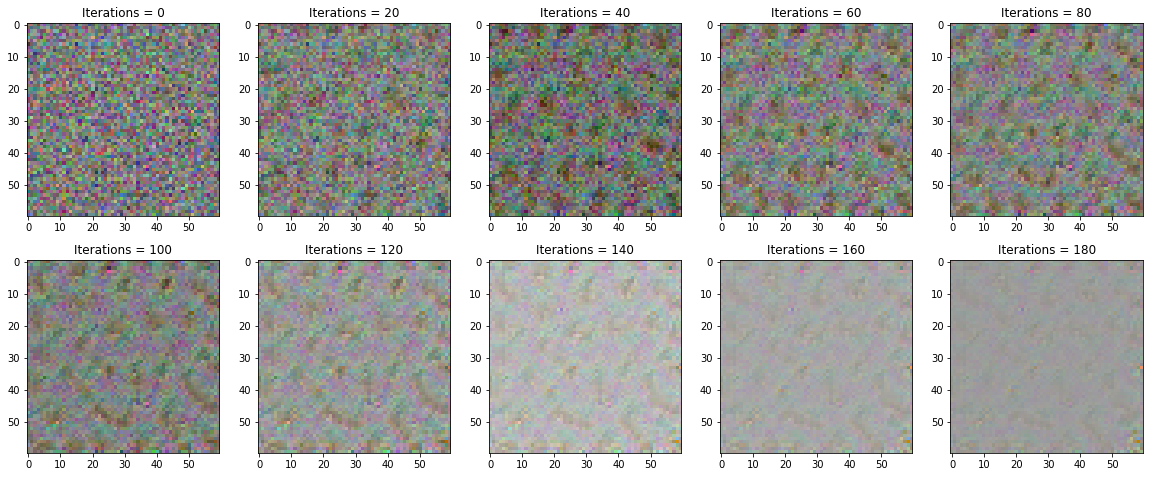

In [218]:
patch_size = (C,60,60)
x_c = torch.zeros(patch_size) 

y = torch.normal(x_c, sig_0)
n_ch,im_d1,im_d2 = y.size()
N = n_ch* im_d1*im_d2
f_y = y.unsqueeze(0)
f_y.requires_grad = False
fig = plt.figure(figsize=(20,8))
for i in range(0, 200):
    if i%20==0:
        plt.subplot(2,5,int(i/20+1))
        to_print = f_y[0]
        plt.imshow(rescale_image(to_print.permute(1,2,0).detach().numpy()))
        plt.title("Iterations = {}".format(i))
    with torch.no_grad():
        f_y = denoiser(f_y)

### Synthèse d'image
Dans le cadre de la synthèse d'image, on fournit à l'algorithme une image uniquement constituée de bruit gaussien. À chaque itération, l'application du débruiteur va permettre de se rapprocher du manifold et donc d'une image naturelle à l'oeil. L'ajout de bruit à chaque itération permet d'éviter de tomber dans un minimul local qui pourrait paraître pas aussi naturelle que souhaitée à cause de la présence d'artefacts, cependant, comme il est possible de le visualiser dans la comparaison pour différentes valeurs de beta, ajouter trop de bruit va faire converger 
l'algorithme vers un fond continu.

#### Visualisation du processus

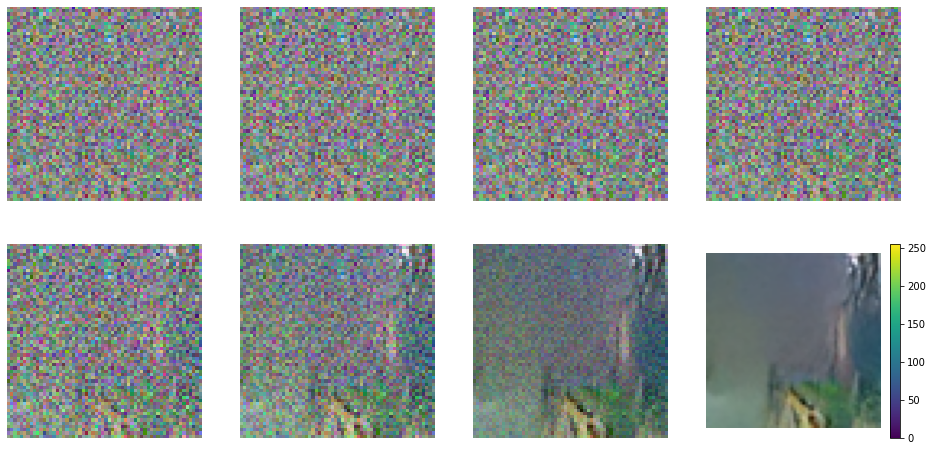

In [76]:
patch_size = (C,60,60) #choose 28x28 for mnist patch size
x_c = torch.zeros(patch_size) 
if torch.cuda.is_available():
    x = x.cuda()
synth = synthesis()
sample, interm_Ys = univ_inv_sol(denoiser, 
                                 x_c = x_c, 
                                 task = synth,
                                 sig_0 = 1,
                                 sig_L = 0.01, 
                                 h0 = 0.05, 
                                 beta = 1,  # change beta to see how quality of generated samples change       
                                 freq = 2,
                                pr = False)
plot_all_samples(sample, interm_Ys)


#### Influence du paramètre beta sur l'image finale

Execution time: 3.598569393157959
Execution time: 5.9385600090026855
Execution time: 3.172182083129883
Execution time: 6.355319261550903
Execution time: 9.550384044647217
Execution time: 12.78966999053955
Execution time: 15.929555177688599


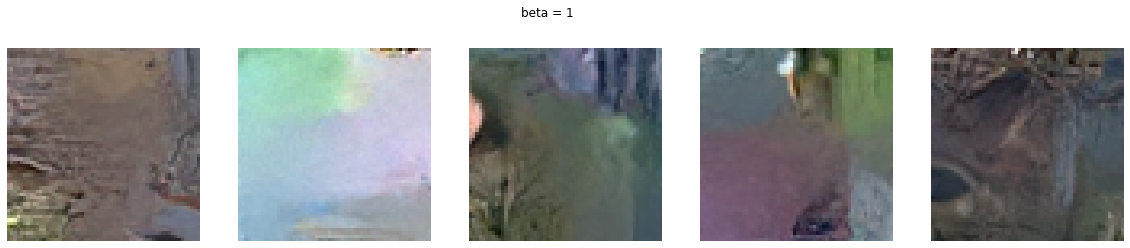

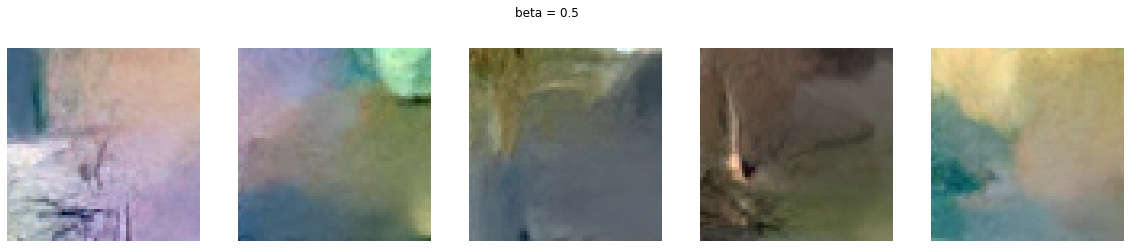

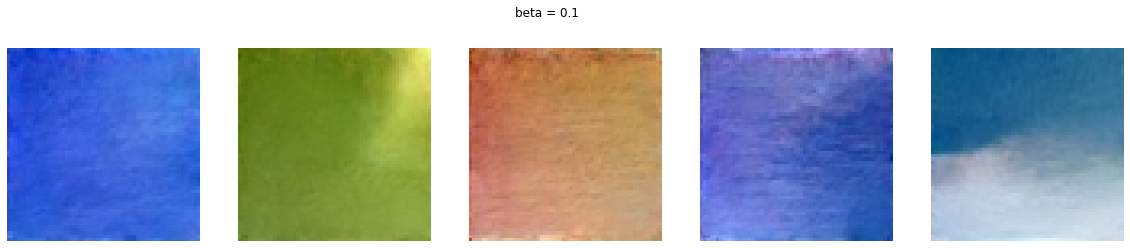

In [75]:
########## BETA = 1 ##########

patch_size = (C,60,60) #choose 28x28 for mnist patch size
x_c = torch.zeros(patch_size) 
if torch.cuda.is_available():
    x = x.cuda()
synth = synthesis()
t = time.time()
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))
plt.suptitle("beta = 1")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 1,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')
print("Execution time: {}".format(time.time()-t))   

########## BETA = 0.5 ##########

t = time.time()
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))    
plt.suptitle("beta = 0.5")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 0.5,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')
    
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))    
print("Execution time: {}".format(time.time()-t))

########## BETA = 0.1 ##########

t = time.time()

plt.suptitle("beta = 0.1")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 0.1,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')

    print("Execution time: {}".format(time.time()-t))   


Le paramètre beta a une autre influence sur la compilation du code autre que le résultat final, le temps de compilation. Plus on ajoute de bruit artificiel à chaque itération, plus cela prend du temps à atteindre le minimum ce qui est en accord avec la formule $\sigma_t^2 = (1-\beta h_t)^2\sigma_{t-1}^2$: lorsque beta tend vers 0 la raison de la décroissance géométrique de la variance tend vers 1.
Les images générés n'ont pas de sens particulier car le réseau de neurones a été entraîné à débruiter des images quelconques, on obtient juste des images qui paraisse naturelle de loin car elles sont composées de formes générales et de contours, pour générer des images avec du sens il faut que le réseau soit entraîner sur des images de même sens.

C'est ce que l'on fait dans le cas où l'on traite d'images de chiffres manuscrits entraînées sur la base de donnés MNIST:

In [77]:
architecture = 'BF_CNN'

# Choix de bdd: 'mnist_gray', 'BSD300_color', 'BSD400_gray'
training_data = 'mnist_gray'

if 'color' in training_data.split('_'): 
    grayscale = False # number of input and output channels is 3
    C = 3
else: 
    grayscale = True # number of input and output channels is 1
    C = 1
    
training_noise='noise_range_0to100' # Le réseau de neurone est entraîné sur des images de bruit d'amplitude variées

denoiser = load_denoiser(architecture=architecture, 
                         grayscale=grayscale, 
                         training_data=training_data, 
                         training_noise=training_noise)

denoiser.eval();

Execution time: 1.431304693222046
Execution time: 4.497973442077637
Execution time: 16.58912205696106
Execution time: 16.042681455612183


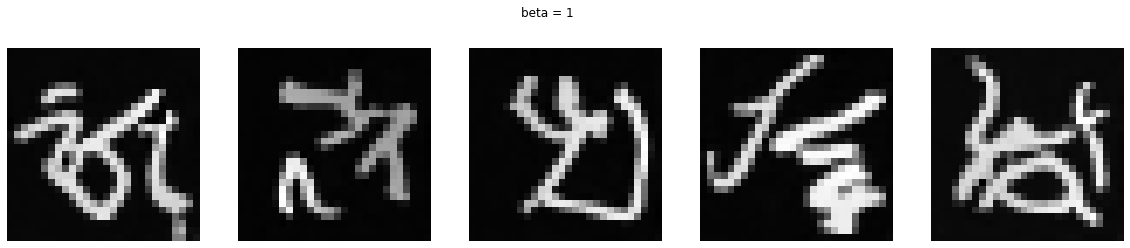

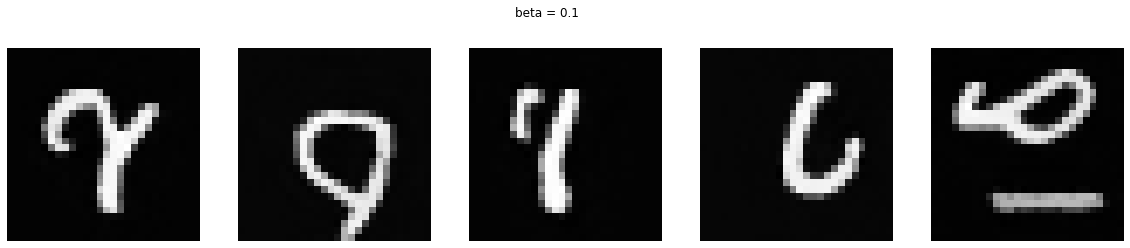

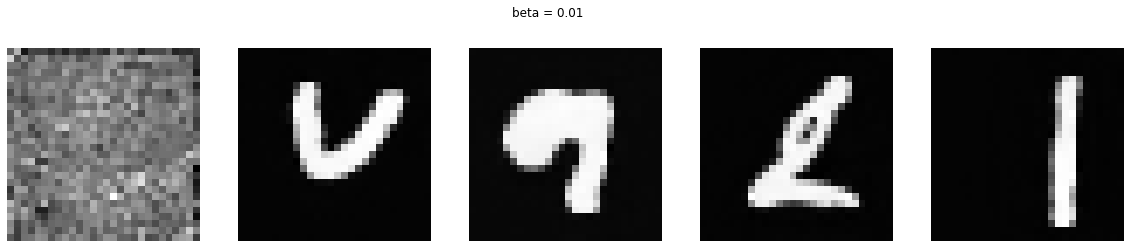

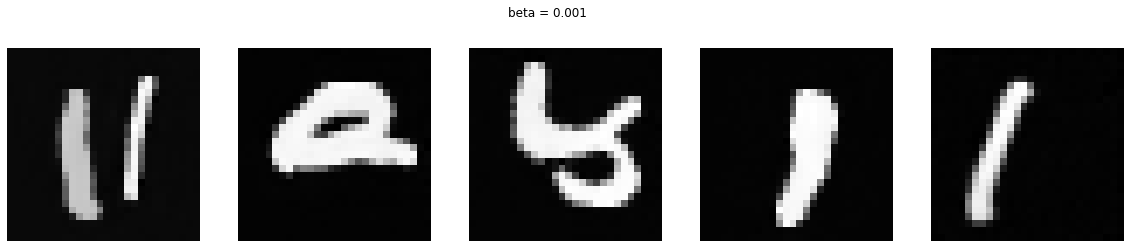

In [84]:
########## BETA = 1 ##########

patch_size = (C,28,28) #choose 28x28 for mnist patch size
x_c = torch.zeros(patch_size) 
if torch.cuda.is_available():
    x = x.cuda()
synth = synthesis()
t = time.time()
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))
plt.suptitle("beta = 1")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 1,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')
print("Execution time: {}".format(time.time()-t))   

########## BETA = 0.5 ##########

t = time.time()
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))    
plt.suptitle("beta = 0.1")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 0.1,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')
    
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))    
print("Execution time: {}".format(time.time()-t))

########## BETA = 0.01 ##########

t = time.time()

plt.suptitle("beta = 0.01")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 0.01,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')

f, axs = plt.subplots(1,5, figsize = ( 4*5,4))    
print("Execution time: {}".format(time.time()-t)) 
    
    ########## BETA = 0.001 ##########

t = time.time()

plt.suptitle("beta = 0.001")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 0.001,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')

print("Execution time: {}".format(time.time()-t))   



Les remarques précédentes sur les images quelconques de couleurs sont toujours valables dans le cas ci-dessus de la base de données MNIST qui correspond à des chiffres écrits à  la main. On peut observer que lorsque beta est trop grand les résultats obtenus sont très détaillés et s'éloigne des chiffres: l'algorithme ne converge pas vers un minimum satisfaisant. Lorsque l'on diminue beta on se rapproche de sigles pouvant s'apparenter à des chiffres mais il arrive que l'algorithme converge vers une image toujours constituée de bruit (cela peut être due à un critère de convergence pas assez strict). De plus une fois que beta est trop petit on obtient souvent un trait vertical unique: lorsque l'on rajoute trop de bruit à chaque itération, cela permet à l'algorithme de converger vers un minimum global qui correspond surement à cette barre verticale.

## Linear inverse problem
La démarche précédente consistait à générer une image à partir d'un bruit gaussien complet. On peut désormais s'intéresser à la restoration d'image: de manière générale on considère une image qui a été altéré par un processus linéaire et ensuite bruitée.

### Image to restore


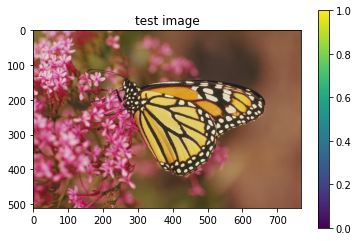

In [151]:
if grayscale is True: 
    path = 'test_images/grayscale/'
else: 
    path = 'test_images/color/'

# test sets: 'Set14', 'Set5', 'BSD100'
test_folder = 'Set14'

# choose an image number
im_num = 2

X = test_image(grayscale, path+test_folder+'/', im_num)
X.show()

### 1  Hole in the image

Dans ce cas on supprime intégrallement une portion de l'image (ici un carré) et ensuite le tout est bruité, on regarde donc si l'algorithme est capable de récupérer la portion manquante.

Dans un premier temps on peut essayer sur une image assez simple: les rayures sur les ailes de papillon.
On se concentre uniquement sur une sous partie de l'image pour avoir des temps de calculs raisonnables.

torch.Size([3, 60, 60])

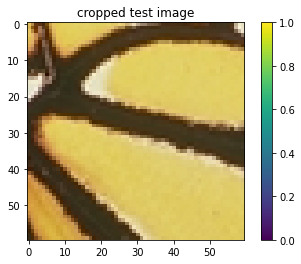

In [172]:
x = X.crop(190, 320,60,60)
x.shape

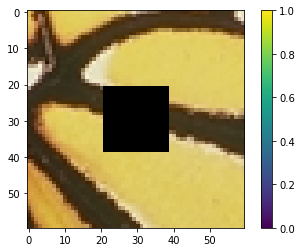

In [173]:
inpaint = inpainting(x_size=x.size(), y0=30, x0=30, h=19, w=19)
plot_corrupted_im(inpaint.M(inpaint.M_T(x)))

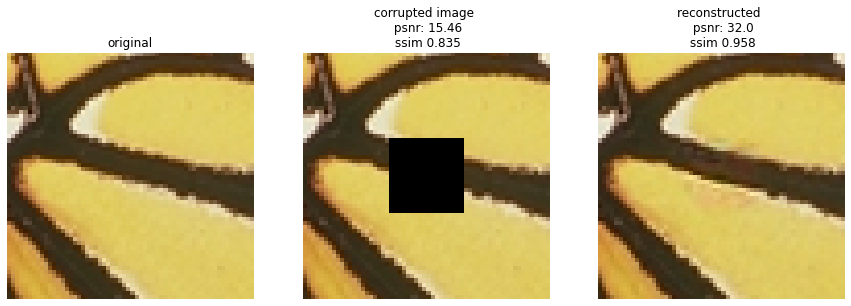

In [176]:
sample, interm_Ys = univ_inv_sol(denoiser, 
                                 x_c = inpaint.M_T(x), 
                                 task = inpaint,
                                 sig_0 = 1,
                                 sig_L = 0.01, 
                                 h0 = 0.1, 
                                 beta = 0.01,          
                                 freq = 40,
                                pr = False)
plot_sample(x, inpaint.M(inpaint.M_T(x)), sample)

Lorsque la portion de l'image manquante est simple on peut voir que le résultat obtenu est très satisfaisant. L'algorithme réussit bien à prolonger le trait noir dans le cas manquant et à proposer un fond de couleur cohérente sur les bords. Les scores psnr et ssim sont d'ailleurs très élevés. Si l'on reproduit la même expérience avec un beta plus grand (donc moins de bruit ajouté à chaque itération) on peut voir que le résultat obtenu est moins bon.

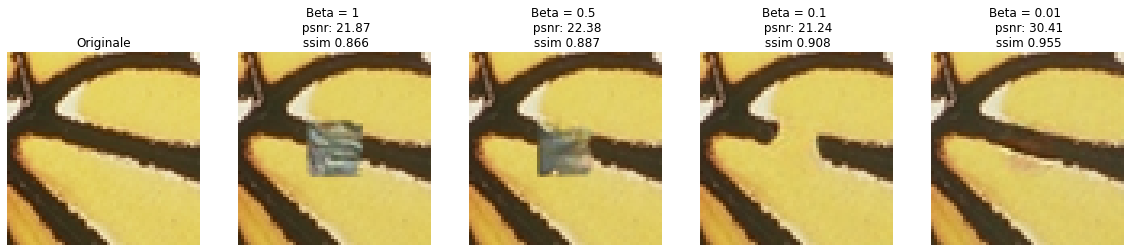

In [197]:
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))

x_permute = x.permute(1,2,0).detach()
axs[0].imshow(rescale_image(x_permute))
axs[0].set_title("Originale")
axs[0].axis('off')

for i, beta in enumerate([1, 0.5, 0.1, .01]):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = inpaint.M_T(x), 
                                     task = inpaint,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.1, 
                                     beta = beta,          
                                     freq = 40,
                                    pr = False)
        ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach()
    ssim = np.round(structural_similarity(x_permute.numpy(), sample.numpy() , channel_axis=2 , data_range=1) ,3)
    psnr = np.round(peak_signal_noise_ratio(x_permute.numpy(), sample.numpy() ),2)   
    axs[i+1].set_title('Beta = {} \n psnr: '.format(beta)+str( psnr) + '\n ssim '+ str(ssim)); 
    axs[i+1].imshow(rescale_image(sample))
    axs[i+1].axis('off')

Utiliser un paramètre beta faible permet d'explorer l'espace des phases et augmente les chances de trouver un minimum proche du minimum global c'est à dire un résultat proche de l'image originel. De manière général dans tout les problèmes de restauration d'images altéré par un processus linéaire il va être important de fixer le paramètre beta à une valeur faible.

torch.Size([3, 70, 70])

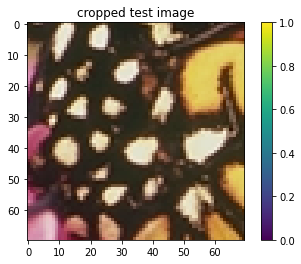

In [219]:
x = X.crop(170, 260,70,70)
x.shape

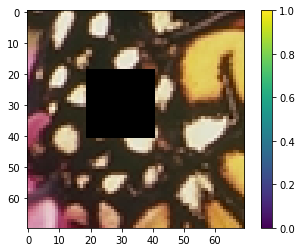

In [220]:
inpaint = inpainting(x_size=x.size(), y0=30, x0=30, h=22, w=22)

plot_corrupted_im(inpaint.M(inpaint.M_T(x)))

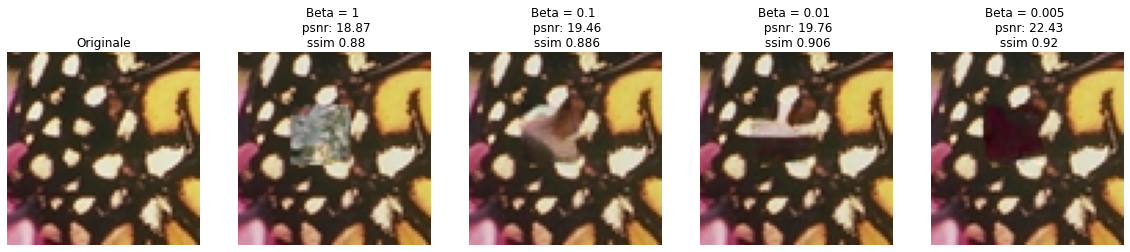

In [217]:
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))

x_permute = x.permute(1,2,0).detach()
axs[0].imshow(rescale_image(x_permute))
axs[0].set_title("Originale")
axs[0].axis('off')

for i, beta in enumerate([1, 0.1, 0.01, .005]):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = inpaint.M_T(x), 
                                     task = inpaint,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.1, 
                                     beta = beta,          
                                     freq = 40,
                                    pr = False)
        ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach()
    ssim = np.round(structural_similarity(x_permute.numpy(), sample.numpy() , channel_axis=2 , data_range=1) ,3)
    psnr = np.round(peak_signal_noise_ratio(x_permute.numpy(), sample.numpy() ),2)   
    axs[i+1].set_title('Beta = {} \n psnr: '.format(beta)+str( psnr) + '\n ssim '+ str(ssim)); 
    axs[i+1].imshow(rescale_image(sample))
    axs[i+1].axis('off')

Lorsque l'image est plus détaillée on obtient des résultats bien moins satisfaisant, les pixels restaurés tendent à être plus ou moins une moyenne des pixels alentours, les motifs/pattern ne sont pas reproduis même avec des valeurs de beta très faible.

#### Cas des images noires et blanches

In [291]:
architecture = 'BF_CNN'

# Choix de bdd: 'mnist_gray', 'BSD300_color', 'BSD400_gray'
training_data = 'BSD400_gray'

if 'color' in training_data.split('_'): 
    grayscale = False # number of input and output channels is 3
    C = 3
else: 
    grayscale = True # number of input and output channels is 1
    C = 1
    
training_noise='noise_range_0to100' # Le réseau de neurone est entraîné sur des images de bruit d'amplitude variées

denoiser = load_denoiser(architecture=architecture, 
                         grayscale=grayscale, 
                         training_data=training_data, 
                         training_noise=training_noise)

denoiser.eval();

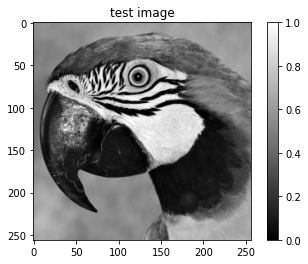

In [310]:
path = 'test_images/grayscale/'
# test sets: 'mnist', 'Set12', 'set68'
test_folder = 'Set12'

# choose an image number
im_num = 10

X = test_image(grayscale, path+test_folder+'/', im_num)
X.show()

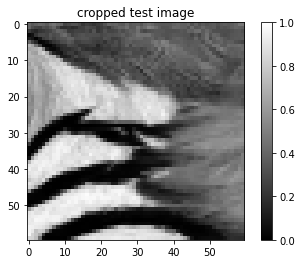

In [323]:
x = X.crop(40,140,60,60)

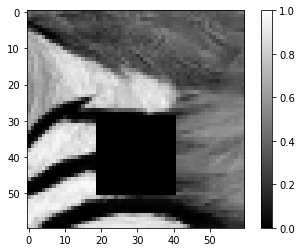

In [324]:
inpaint = inpainting(x_size=x.size(), y0=30, x0=40, h=22, w=22)

plot_corrupted_im(inpaint.M(inpaint.M_T(x)))

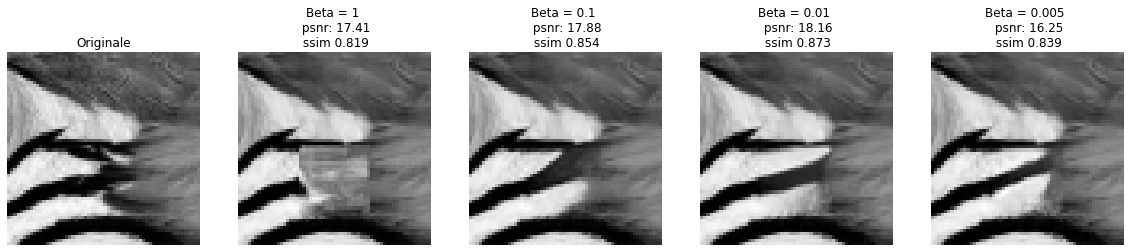

In [326]:
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))

x_permute = x.permute(1,2,0).detach()
axs[0].imshow(x_permute.squeeze(-1),'gray' ,vmin=0, vmax = 1)
axs[0].set_title("Originale")
axs[0].axis('off')

for i, beta in enumerate([1, 0.1, 0.01, .005]):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = inpaint.M_T(x), 
                                     task = inpaint,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.1, 
                                     beta = beta,          
                                     freq = 40,
                                    pr = False)
        ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach()
    ssim = np.round(structural_similarity(x_permute.squeeze(-1).numpy(), sample.squeeze(-1).numpy() , data_range=1) ,3)
    psnr = np.round(peak_signal_noise_ratio(x_permute.numpy(), sample.numpy() ),2)   
    axs[i+1].set_title('Beta = {} \n psnr: '.format(beta)+str( psnr) + '\n ssim '+ str(ssim)); 
    axs[i+1].imshow(sample.squeeze(-1),'gray' ,vmin=0, vmax = 1)
    axs[i+1].axis('off')

Dans le cas des images noires et blanc on voit que l'on obtient de moins bons scores de précisions, cela est surement du à une quantité d'informations plus faible pour reconstruire l'image. Les images obtenues paraissent tout de même naturelles, elles ne sont juste pas aussi proche de l'image original.

*** Retained 2160 / 10800 (20.0%) of dimensions
----------------------------- 40
sigma  0.8635392785072327
----------------------------- 80
sigma  0.6654329895973206
----------------------------- 120
sigma  0.3910675346851349
----------------------------- 160
sigma  0.1966208815574646
----------------------------- 200
sigma  0.06719523668289185
-------- total number of iterations,  222
-------- average time per iteration (s),  0.0416


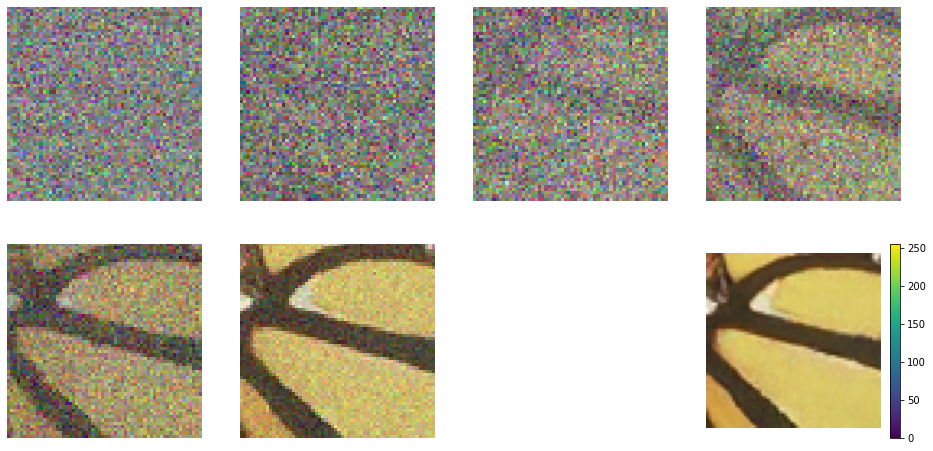

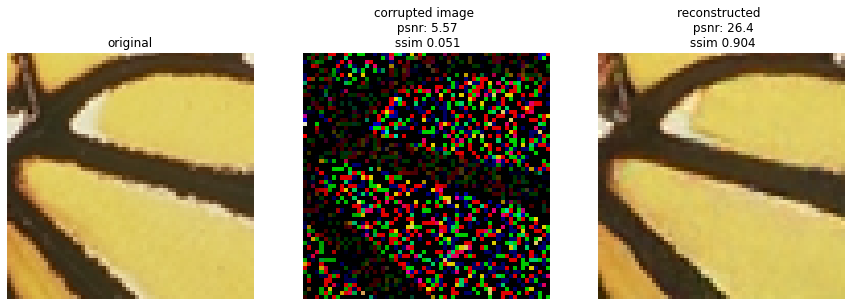

In [21]:
# Retain a random subset of pixels. 
rand_pix = rand_pixels(x_size = x.size(), p = 0.2) # p = fraction of pixels kept

print_dim(measurment_dim=rand_pix.mask.sum().item(), image_dim=np.prod(x.shape))

sample, interm_Ys = univ_inv_sol(denoiser, 
                                 x_c = rand_pix.M_T(x), 
                                 task = rand_pix,
                                 sig_0 = 1 ,
                                 sig_L = 0.01, 
                                 h0 = 0.01, 
                                 beta = 0.01,          
                                 freq = 40,
                                pr = False)
plot_all_samples(sample, interm_Ys)
plot_sample(x, rand_pix.M(rand_pix.M_T(x)), sample)





*** Retained 675 / 10800 (6.25%) of dimensions
----------------------------- 40
sigma  0.8694466948509216
----------------------------- 80
sigma  0.576798677444458
----------------------------- 120
sigma  0.3622468113899231
----------------------------- 160
sigma  0.18507343530654907
----------------------------- 200
sigma  0.05220261588692665
-------- total number of iterations,  216
-------- average time per iteration (s),  0.0428


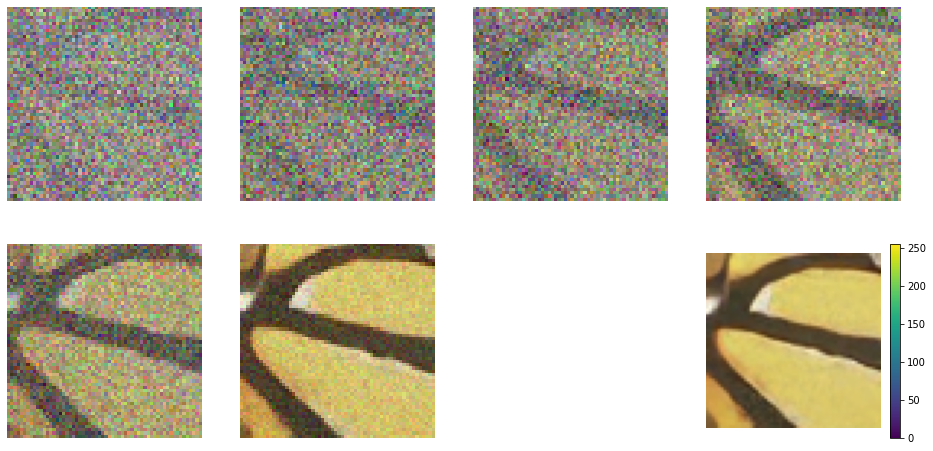

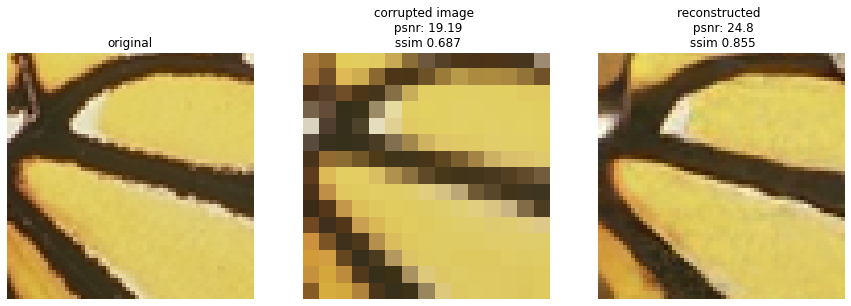

In [22]:
# Subsample image by factor of s (both horizontally and vertially)
super_res = super_resolution(x_size=x.size(), s = 4)

print_dim(measurment_dim=np.prod(super_res.M_T(x).shape), image_dim=np.prod(x.shape))

sample , interm_Ys = univ_inv_sol(denoiser, 
                                  x_c = super_res.M_T(x), 
                                  task = super_res,
                                  sig_0 = 1 ,
                                  sig_L = 0.01, 
                                  h0 = 0.01, 
                                  beta = 0.01,          
                                  freq = 40,
                                pr = False)
plot_all_samples(sample, interm_Ys)

plot_sample(x,super_res.M(super_res.M_T(x)), sample)

/home/alexis/Work/ENS_M2/machine_learning/project_ML/Jupyter/Utils_inverse_prob.py:376: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2426.)
  self.U, _ = torch.qr(torch.randn(int(np.prod(x_size)),int(np.prod(x_size)*p) ))


*** Retained 2160 / 10800 (20.0%) of dimensions
----------------------------- 40
sigma  0.9209371209144592
----------------------------- 80
sigma  0.6829553842544556
----------------------------- 120
sigma  0.43155309557914734
----------------------------- 160
sigma  0.24919819831848145
----------------------------- 200
sigma  0.12118636816740036
----------------------------- 240
sigma  0.009595902636647224
-------- total number of iterations,  241
-------- average time per iteration (s),  0.0716


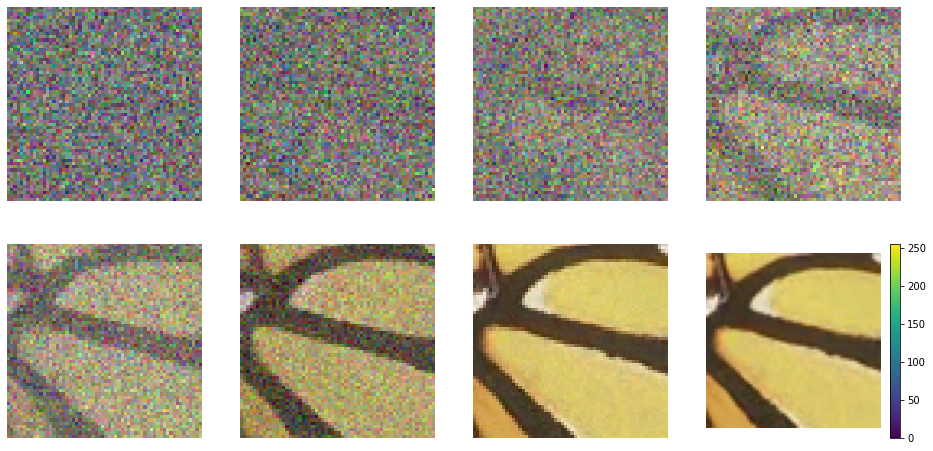

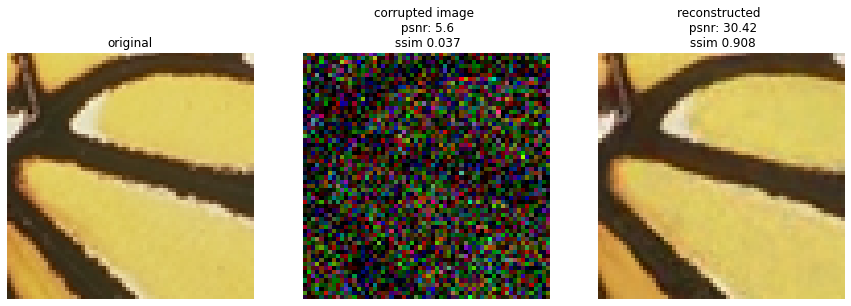

In [23]:
# Project image onto a random set of basis functions
rand_basis = random_basis(x_size = x.shape , p = 0.2) # p = fraction of dimensions kept

print_dim(measurment_dim=rand_basis.U.shape[1], image_dim=np.prod(x.shape))

sample, interm_Ys = univ_inv_sol(denoiser, 
                                 x_c = rand_basis.M_T(x), 
                                 task = rand_basis,
                                 sig_0 = 1,
                                 sig_L = 0.01, 
                                 h0 = 0.01, 
                                 beta = .01,          
                                 freq = 40,
                                pr = False)
plot_all_samples(sample, interm_Ys)

plot_sample(x, rand_basis.M(rand_basis.M_T(x)), sample)

*** Retained 2028 / 10800 (18.778%) of dimensions
----------------------------- 40
sigma  0.9135640859603882
----------------------------- 80
sigma  0.7622822523117065
----------------------------- 120
sigma  0.5488027334213257
----------------------------- 160
sigma  0.3699174225330353
----------------------------- 200
sigma  0.23725540935993195
----------------------------- 240
sigma  0.12026280164718628
----------------------------- 280
sigma  0.02321411482989788
-------- total number of iterations,  287
-------- average time per iteration (s),  0.0458


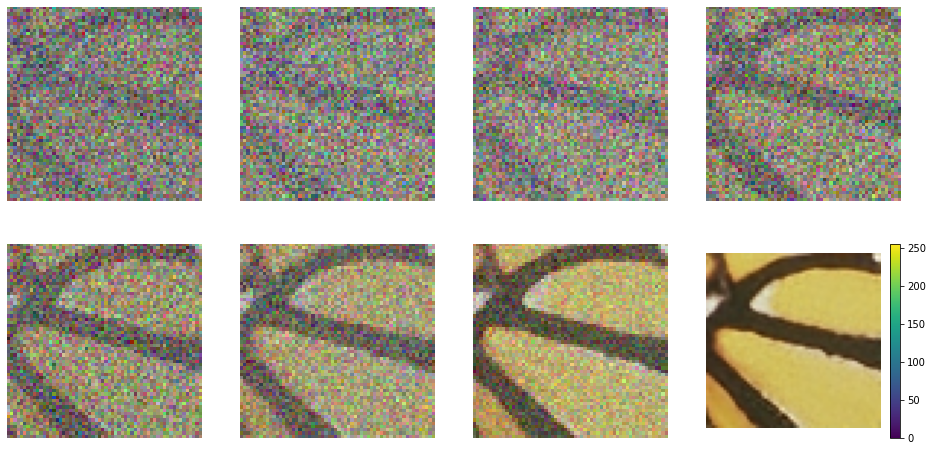

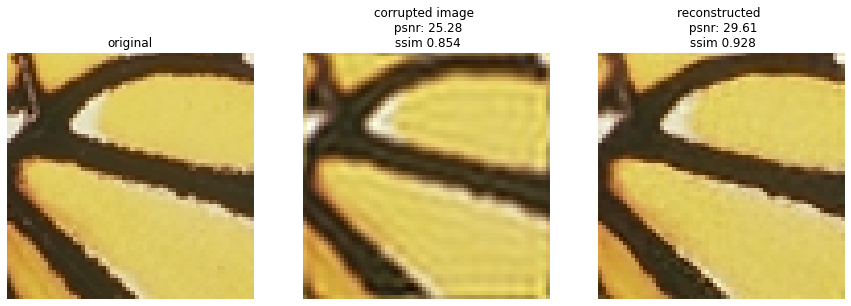

In [24]:
# Project onto low frequencies (a subset of the Fourier basis)
spec_super_res = spectral_super_resolution(x_size= x.size(), p = 0.2) # p=fraction of low frequencies kept

print_dim(measurment_dim=spec_super_res.mask.sum()*C, image_dim=np.prod(x.shape))

sample , interm_Ys = univ_inv_sol(denoiser, 
                                  x_c=spec_super_res.M_T(x), 
                                  task = spec_super_res,
                                  sig_0=1 ,
                                  sig_L=.01, 
                                  h0=.01, 
                                  beta = 0.01,          
                                  freq = 40,
                                pr = False)
plot_all_samples(sample, interm_Ys)

plot_sample(x, spec_super_res.M(spec_super_res.M_T(x) ), sample)